In [38]:
import numpy as np
import math 
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

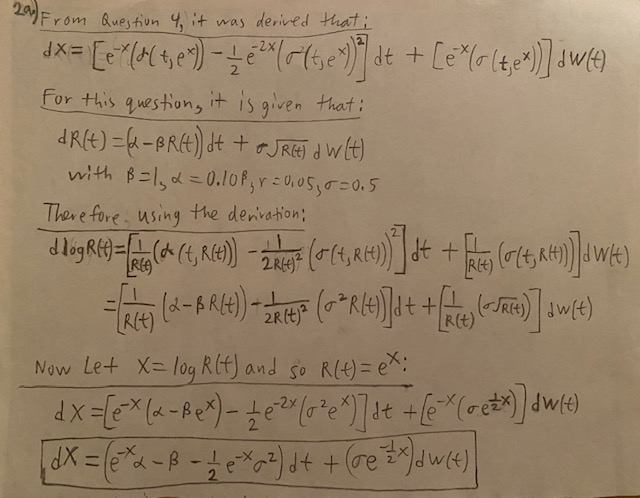

In [39]:
#2b.)

def beta_Rn(alpha, Rn, beta, sigma, log_method):
  if log_method == False:
    beta_Rn = alpha - (Rn * beta)
  else:
    beta_Rn = (np.exp(-Rn) * (alpha - ((sigma ** 2)/2))) - beta

  return beta_Rn

def gamma_Rn(sigma, Rn, log_method):
  if log_method == False:
    gamma_Rn = sigma * np.sqrt(Rn)
  else:
    gamma_Rn = sigma * np.exp(-Rn/2)

  return gamma_Rn

def simulate_path(R0, beta, alpha, sigma, dt, N, log_method):
  R = np.zeros(N)
  R[0] = R0

  sign = "positive"
  for n in range(1, N):
    dW = np.random.normal(loc = 0, scale = np.sqrt(dt))
    R[n] = R[n - 1] + (beta_Rn(alpha, R[n - 1], beta, sigma, log_method) * dt) + (gamma_Rn(sigma, R[n - 1], log_method) * dW)

    if R[n] <= 0:
      sign = "not positive"
      return R, sign

  return R, sign

def get_paths(R0, beta, alpha, sigma, dt, M, N, log_method):
  valid_paths = []
  bad_paths = []

  valid_paths_count = 0
  bad_paths_count = 0

  for i in range(M):
    path, sign = simulate_path(R0, beta, alpha, sigma, dt, N, log_method)
    if sign == "not positive":
      bad_paths.append(path)
      bad_paths_count = bad_paths_count + 1
      print("Generated a Bad Path with Path #" + str(i))
    else:
      valid_paths.append(path)
      valid_paths_count = valid_paths_count + 1 

  return valid_paths, bad_paths, valid_paths_count, bad_paths_count  

R0 = 0.05
beta = 1
alpha = 0.1 * beta
sigma = 0.5
dt = 0.01
N = 10
M = 1000

valid_paths, bad_paths, valid_paths_count, bad_paths_count = get_paths(R0, beta, alpha, sigma, dt, M, N, False)
print("\nNumber of Valid Paths Generated: " + str(valid_paths_count))
print("Number of Bad Paths Generated: " + str(bad_paths_count))

Generated a Bad Path with Path #43
Generated a Bad Path with Path #47
Generated a Bad Path with Path #574
Generated a Bad Path with Path #696
Generated a Bad Path with Path #758
Generated a Bad Path with Path #914
Generated a Bad Path with Path #951

Number of Valid Paths Generated: 993
Number of Bad Paths Generated: 7


In [53]:
#2c.)

mean_list = []
std_list = []

path_number = 1
for path_time in (np.array(valid_paths)).T:
  mean = np.mean(path_time)
  std_dev = np.std(path_time, ddof = 1)

  print("Sample Mean at Time t = " + str(path_number) + ": " + str(mean))
  print("Sample Standard Deviation at Time t = " + str(path_number) + ": " + str(std_dev) + "\n")

  mean_list.append(mean)
  std_list.append(std_dev)

  path_number = path_number + 1

Sample Mean at Time t = 1: 0.05
Sample Standard Deviation at Time t = 1: 0.0

Sample Mean at Time t = 2: 0.05007419062504682
Sample Standard Deviation at Time t = 2: 0.010806689611422763

Sample Mean at Time t = 3: 0.050959386506278084
Sample Standard Deviation at Time t = 3: 0.015552342332629098

Sample Mean at Time t = 4: 0.052020650268787876
Sample Standard Deviation at Time t = 4: 0.019739611800543785

Sample Mean at Time t = 5: 0.05366777634136567
Sample Standard Deviation at Time t = 5: 0.023318977477503583

Sample Mean at Time t = 6: 0.053758257397396335
Sample Standard Deviation at Time t = 6: 0.025604412848894427

Sample Mean at Time t = 7: 0.05418548398130151
Sample Standard Deviation at Time t = 7: 0.027485785240715807

Sample Mean at Time t = 8: 0.05514555790027893
Sample Standard Deviation at Time t = 8: 0.029595511195549262

Sample Mean at Time t = 9: 0.055365514538115994
Sample Standard Deviation at Time t = 9: 0.03183598129849251

Sample Mean at Time t = 10: 0.055830280

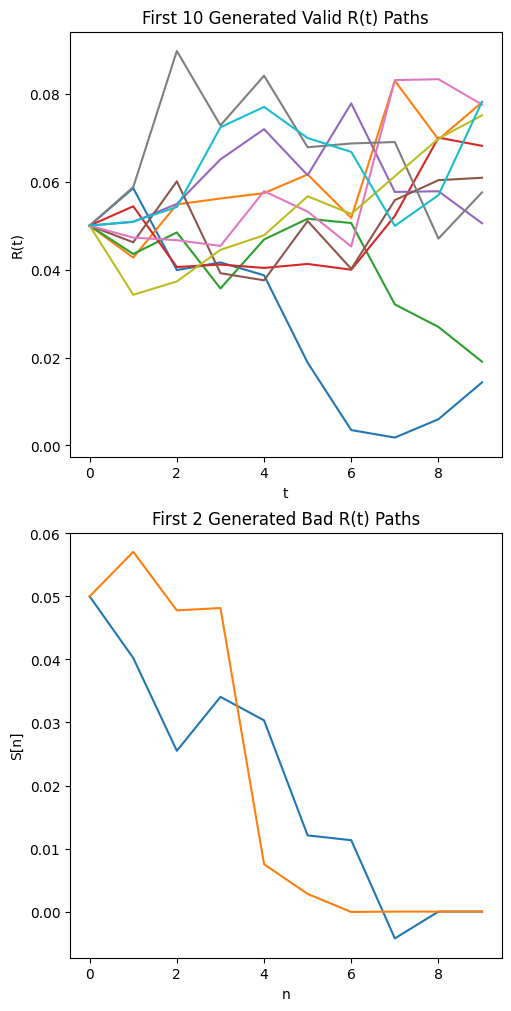

In [41]:
#2d.)

fig, ax = plt.subplots(2, 1, constrained_layout = True, figsize = (5, 10))

t = np.arange(0, N, 1)

for path in valid_paths[:10]:
  ax[0].plot(t, path)

ax[0].set_title("First 10 Generated Valid R(t) Paths")
ax[0].set_xlabel("t")
ax[0].set_ylabel("R(t)") 

for path in bad_paths[:2]:
  ax[1].plot(t, path)

ax[1].set_title("First 2 Generated Bad R(t) Paths")
ax[1].set_xlabel("n")
ax[1].set_ylabel("S[n]") 

fig.show()

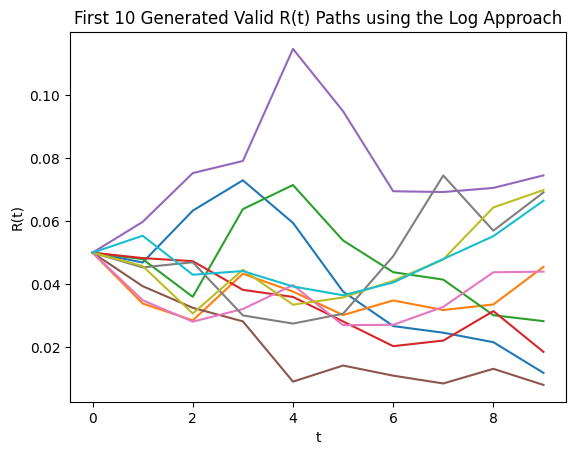

Sample Mean at Time t = 1: 0.05000000000000002
Sample Standard Deviation at Time t = 1: 6.9423659551147e-18

Sample Mean at Time t = 2: 0.05028181343939003
Sample Standard Deviation at Time t = 2: 0.011264279162799352

Sample Mean at Time t = 3: 0.05110690510691171
Sample Standard Deviation at Time t = 3: 0.015526276882419735

Sample Mean at Time t = 4: 0.05147329330212281
Sample Standard Deviation at Time t = 4: 0.018956556125579827

Sample Mean at Time t = 5: 0.05141210367039764
Sample Standard Deviation at Time t = 5: 0.02182509036100051

Sample Mean at Time t = 6: 0.05160265273995113
Sample Standard Deviation at Time t = 6: 0.024238211168359433

Sample Mean at Time t = 7: 0.052148178430550085
Sample Standard Deviation at Time t = 7: 0.02606151606385671

Sample Mean at Time t = 8: 0.05230100557192122
Sample Standard Deviation at Time t = 8: 0.027864946101358503

Sample Mean at Time t = 9: 0.05265443515861796
Sample Standard Deviation at Time t = 9: 0.03051280192220958

Sample Mean a

In [56]:
#2e.)

def beta_log(alpha, beta, sigma, x):
  beta = (np.exp(-x) * alpha) - (beta) - (0.5 * np.exp(-x) * (sigma ** 2))
  
  return beta

def gamma_log(sigma, x):
  gamma = (sigma * np.exp(-0.5 * x))

  return gamma

X0 = np.log(R0)

X = np.zeros((N, M))
X[0] = X0

for n in range(1, N):
  dW = np.random.normal(size = M, loc = 0, scale = np.sqrt(dt))
  X[n] = X[n - 1] + (beta_log(alpha, beta, sigma, X[n - 1]) * dt) + (gamma_log(sigma, X[n - 1]) * dW)

R = np.exp(X)
t = np.arange(0, N, 1)

for i in range(10):
  plt.plot(t, R[:, i])

plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('First 10 Generated Valid R(t) Paths using the Log Approach')
plt.show()

log_mean_list = []
log_std_list = []

for i in range(R.shape[0]):

  mean = np.mean(R[i, :])
  std_dev = np.std(R[i, :], ddof = 1)

  print("Sample Mean at Time t = " + str(i + 1) + ": " + str(mean))
  print("Sample Standard Deviation at Time t = " + str(i + 1) + ": " + str(std_dev) + "\n")

  log_mean_list.append(mean)
  log_std_list.append(std_dev)

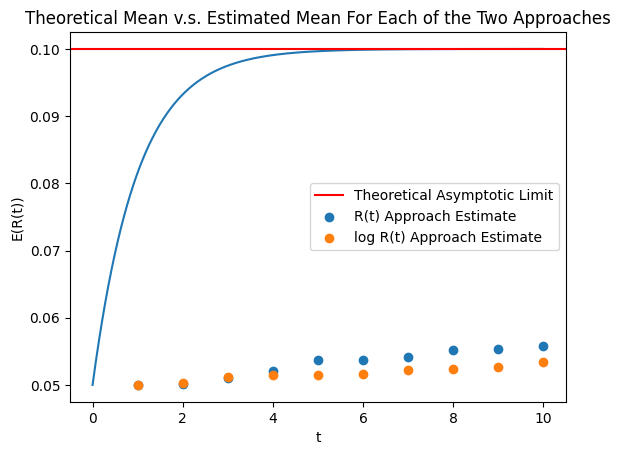

In [69]:
t_list = np.arange(0, 10, 0.01)
t_list_discrete = np.arange(1, 11, 1)

theoretical_mean = (np.exp(-beta * t_list) * R0) + ((alpha/beta) * (1 - np.exp(-beta * t_list)))
theoretical_variance = ((sigma ** 2) / beta) * R0 * (np.exp(-beta * t_list) - np.exp(-2 * beta * t_list)) + ((alpha * sigma**2)/2 * beta**2) * (1 - 2 * np.exp(-2 * beta * t_list) - np.exp(-2 * beta * t_list))

asymptote_mean = alpha/beta

plt.plot(t_list, theoretical_mean)
plt.axhline(y = asymptote_mean, color = 'red', label = 'Theoretical Asymptotic Limit')
plt.scatter(t_list_discrete, mean_list, label = "R(t) Approach Estimate")
plt.scatter(t_list_discrete, log_mean_list, label = "log R(t) Approach Estimate")
plt.legend()
plt.title('Theoretical Mean v.s. Estimated Mean For Each of the Two Approaches')
plt.xlabel('t')
plt.ylabel('E(R(t))')
plt.show()

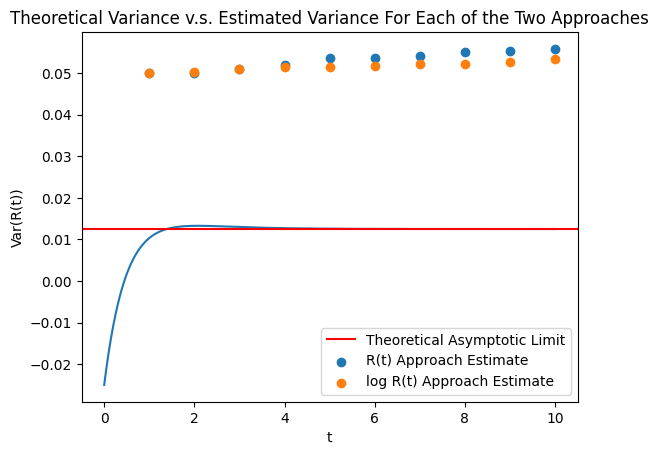

In [70]:
theoretical_variance = ((sigma ** 2) / beta) * R0 * (np.exp(-beta * t_list) - np.exp(-2 * beta * t_list)) + ((alpha * sigma**2)/2 * beta**2) * (1 - 2 * np.exp(-2 * beta * t_list) - np.exp(-2 * beta * t_list))

asymptote_variance = ((alpha * sigma**2)/2 * beta**2) 

plt.plot(t_list, theoretical_variance)
plt.axhline(y = asymptote_variance, color = 'red', label = 'Theoretical Asymptotic Limit')
plt.scatter(t_list_discrete, mean_list, label = "R(t) Approach Estimate")
plt.scatter(t_list_discrete, log_mean_list, label = "log R(t) Approach Estimate")
plt.legend()
plt.title('Theoretical Variance v.s. Estimated Variance For Each of the Two Approaches')
plt.xlabel('t')
plt.ylabel('Var(R(t))')
plt.show()